<a href="https://colab.research.google.com/github/Aquilaltair/Dasboard_1/blob/main/copy_of_proyek_analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yuliyanti Dewi Lestari
- **Email:** yuliyanti.lestari@mhs.ac.id
- **ID Dicoding:** MC229D5X0864

## Menentukan Pertanyaan Bisnis

- Bagaimana terdapat hubungan antara suhu dan jumlah peminjam sepeda?
- Pada jam berapa peminjaman sepeda paling ramai?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
bike_day_df = pd.read_csv("/content/day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data pertama yang harus kita muat ialah data dari tabel peminjaan sepeda setiap hari dan tabel diatas merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [ ]:
bike_hour_df = pd.read_csv("/content/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data pertama yang harus kita muat ialah data dari tabel peminjaan sepeda setiap **jam** dan tabel diatas merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

### Assessing Data

In [ ]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam customers_df. Proses ini dapat dilakukan menggunakan method info(). Jika dilihat, tidak terdapat missing value pada data, namun terdapat beberapa data type yang masih kurang tepat.

In [ ]:
bike_day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Seperti yang sudah dilihat pada langkah sebelumnya, untuk memastikan kembali apakah terdapat missing value atau nilai yang kosong pada masing masing kolom pada dataset, maka dapat menggunakan source code isna().sum(). Berdasarkan tampilan diatas, maka tidak terdapat missing value pada dataset tersebut.

In [ ]:
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Kode tersebut menampilkan jumlah data yang berduplicate, namun pada dataset ini tidakterdapat duplikasi data.

In [ ]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Selanjutnya akan dilakukan, memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.)
- Jika dilihat, terdapat keanehan pada kolom, season, wethershit, yang masih dilambangkan dengan angka, sehingga untuk mempermudah pengolahan data, nantinya perlu dilakukan cleaning data.

In [ ]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Insight:
- Data pertama yang harus kita muat ialah data dari tabel peminjaan sepeda setiap jam dan tabel diatas merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [ ]:
bike_hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Insight:

- Seperti yang sudah dilihat pada langkah sebelumnya, untuk memastikan kembali apakah terdapat missing value atau nilai yang kosong pada masing masing kolom pada dataset, maka dapat menggunakan source code isna().sum(). Berdasarkan tampilan diatas, maka tidak terdapat missing value pada dataset tersebut.
- Jika dilihat, terdapat keanehan pada kolom, season, wethershit, yang masih dilambangkan dengan angka, sehingga untuk mempermudah pengolahan data, nantinya perlu dilakukan cleaning data.

In [ ]:
print("Jumlah duplikasi: ", bike_hour_df.duplicated().sum())

Jumlah duplikasi:  0


Insight:
- Kode tersebut menampilkan jumlah data yang berduplicate, namun pada dataset ini tidakterdapat duplikasi data.


In [ ]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:

- Selanjutnya akan dilakukan, memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.)
- Jika dilihat, terdapat keanehan pada kolom, season, wethershit, yang masih dilambangkan dengan angka, sehingga untuk mempermudah pengolahan data, nantinya perlu dilakukan cleaning data.

### Cleaning Data

In [ ]:
# Mengubah kolom temp menjadi nilai asli dalam Celsius
bike_day_df["temp_celsius"] = bike_day_df["temp"] * 41

# Menampilkan 5 baris pertama
bike_day_df[["temp", "temp_celsius"]].head()


,temp,temp_celsius
0,0.344167,14.110847
1,0.363478,14.902598
2,0.196364,8.050924
3,0.200000,8.200000
4,0.226957,9.305237


**Insight**
- Pada dataset bike_day_df colom suhu masih dinyatakan dalam suatu rasio perbandingan. Sehingga, agar memudahkan dalam visualisasi data, perlu diubah kedalam satuan yang lebih umum, yaitu dalam derajat celsius.

In [ ]:
bike_hour_df["temp_celsius"] = bike_hour_df["temp"] * 41
bike_hour_df[["temp", "temp_celsius"]].head()

,temp,temp_celsius
0,0.24,9.84
1,0.22,9.02
2,0.22,9.02
3,0.24,9.84
4,0.24,9.84


**Insight**
- Seperti pada dataset bike_day_df, dataset bike_hour_df juga terdapat colom suhu yang masih dinyatakan dalam suatu rasio perbandingan. Sehingga, agar memudahkan dalam visualisasi data, perlu diubah kedalam satuan yang lebih umum, yaitu dalam derajat celsius.

In [ ]:
bike_hour_df["hr_formatted"] = bike_hour_df["hr"].apply(lambda x: f"{x:02d}:00")
bike_hour_df[["hr", "hr_formatted"]].head()


,hr,hr_formatted
0,0,00:00
1,1,01:00
2,2,02:00
3,3,03:00
4,4,04:00


In [ ]:
datetime_columns = ["dteday"]
category_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for column in datetime_columns:
  bike_day_df[column] = pd.to_datetime(bike_day_df[column])

for column in category_columns:
  bike_day_df[column] = bike_day_df[column].astype("category")

bike_day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday        731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   yr            731 non-null    category      
 4   mnth          731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weathersit    731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  cnt           731 non-null    int64     

In [ ]:
category_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
string_columns = ["hr_formatted"]

for column in category_columns:
  bike_hour_df[column] = bike_hour_df[column].astype("category")

for column in string_columns:
  bike_hour_df[column] = bike_hour_df[column].astype("string")
for column in datetime_columns:
  bike_hour_df[column] = pd.to_datetime(bike_hour_df[column])
bike_hour_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   yr            17379 non-null  category      
 4   mnth          17379 non-null  category      
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weathersit    17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

**Insight:**
- Pada proses cleaning data ini kedua dataset, mengalami perubahan type data pada kolom dteday yang awalnya integer diubah kedalam tipe data datetime.
- type data pada kolom season, yr, mnth, holiday,weekday,workingday, wethersit biubah menjadi category supaya memperkecil penyimpanan data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,20.310776
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2.424346
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,13.820424
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,20.431653
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,26.872076
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,35.328347


**Insight:**
- Source code diatas menunjukan stastistik deskriptif dari dataset bike_day_df.

In [ ]:
bike_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_celsius,hr_formatted
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,NaN,3.0,1.0,5.0,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00
freq,NaN,NaN,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,20.376474,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,13.940000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,20.500000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,27.060000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,41.000000,NaN


**Insight:**

Source code diatas menunjukan stastistik deskriptif dari dataset bike_hour_df.



In [ ]:
correlation = bike_day_df["temp_celsius"].corr(bike_day_df["cnt"])

print(f"Korelasi antara suhu dan peminjaman sepeda setiap hari: {correlation:.2f}")

Korelasi antara suhu dan peminjaman sepeda setiap hari: 0.63


**Insight**

Untuk mengetahui apakah terdapat hubungan antara suhu dan jumlah peminjam sepeda setiap hari, maka dilakukan uji korelasi terlebih dahulu. berdasarkan output diatas, ternyata terdapat corelasi yang cukup signifikan antara suhu dan jumlah peminjam sepeda.

In [ ]:
bike_hour_df.groupby(by='hr').agg({
    'cnt': ['mean'],
})

,cnt
,mean
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649


**Insight:**
- Untuk mengetahui peminjaman sepeda paling ramai, maka perlu pengelompokan jam peminjaman sepeda dan menghitung rata rata peminjamnya.
- dari data tersebut terlihat paling ramai peminjaman sepeda, dilakukan pada jam 17.00

## Visualization & Explanatory Analysis

### Pertanyaan 1:

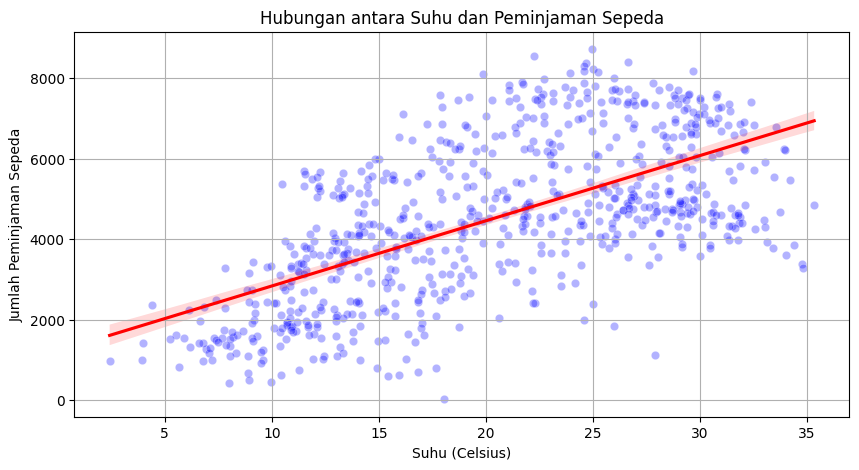

In [ ]:
# Plot scatter untuk melihat hubungan suhu vs jumlah peminjaman sepeda
plt.figure(figsize=(10, 5))
sns.scatterplot(x=bike_day_df["temp_celsius"], y=bike_day_df["cnt"], alpha=0.3, color="b")

# Menambahkan trendline dengan regression plot
sns.regplot(x=bike_day_df["temp_celsius"], y=bike_day_df["cnt"], scatter=False, color="red")

# Menambahkan label dan judul
plt.xlabel("Suhu (Celsius)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan antara Suhu dan Peminjaman Sepeda")
plt.grid(True)
plt.show()

**insight**
- Code diatas merupakan code yang digunakan untuk memvisualisasikan data hubungan antara suhu dan banyak peminjam sepeda setiap harinya.

### Pertanyaan 2:

<ipython-input-53-ea35a039ec4f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr_formatted", y="cnt", data=bike_hour_avg.sort_values(by="cnt",ascending=False).head(5), palette=colors, ax=ax[0])
<ipython-input-53-ea35a039ec4f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr_formatted", y="cnt", data=bike_hour_avg.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])


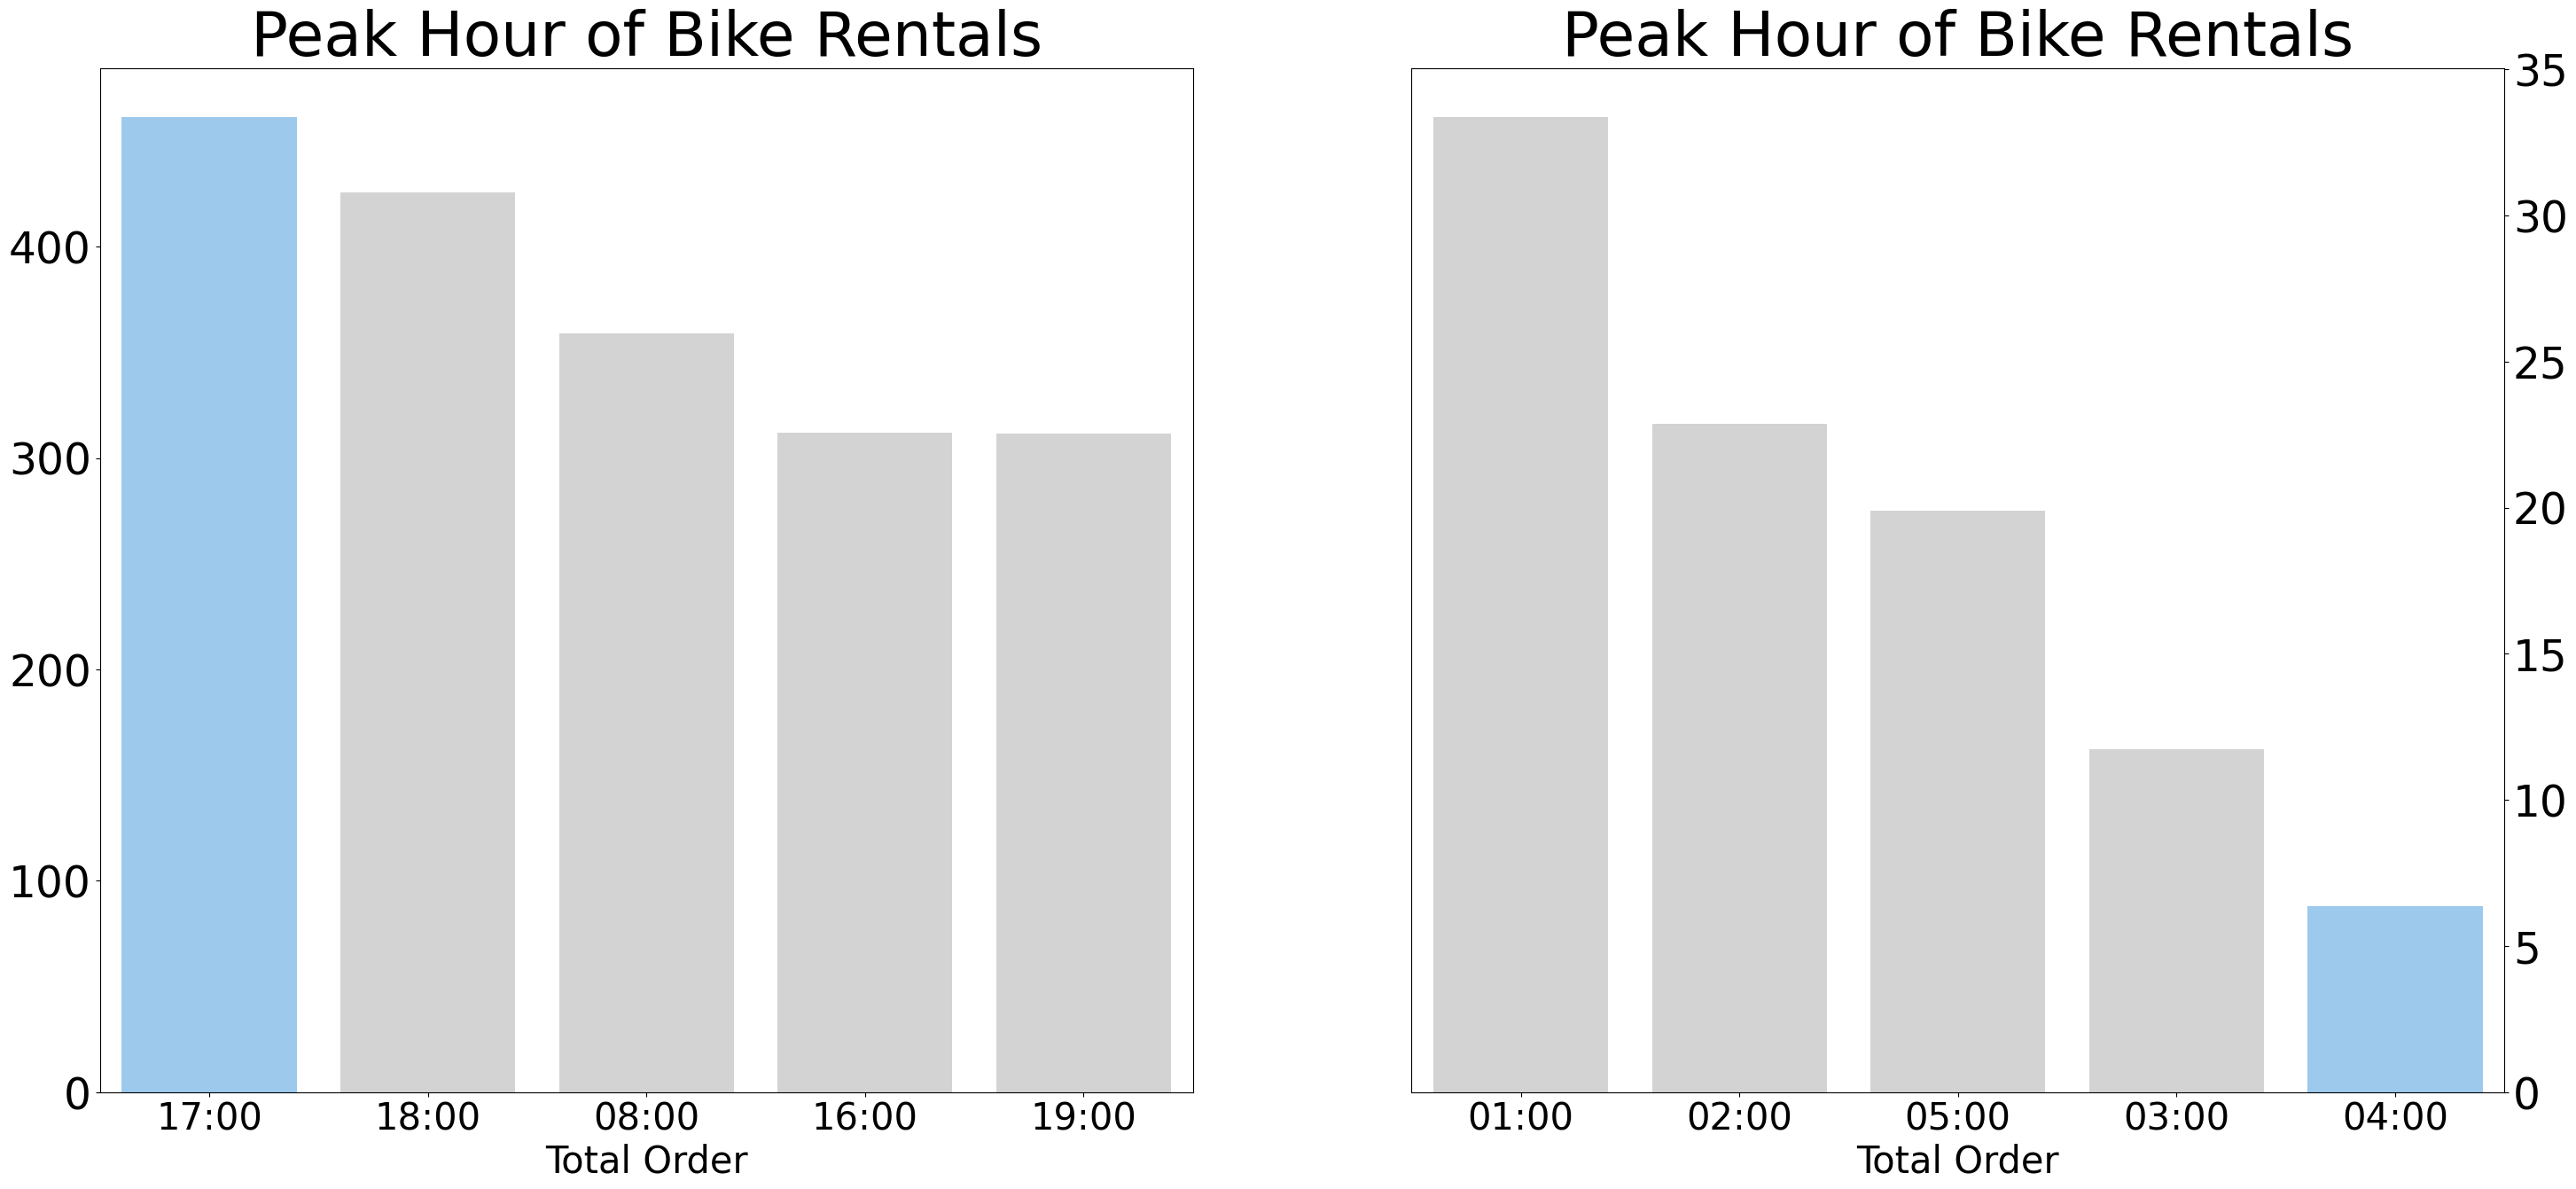

In [ ]:
# Hitung rata-rata peminjaman sepeda per jam
bike_hour_avg = bike_hour_df.groupby("hr_formatted", as_index=False)["cnt"].mean()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="hr_formatted", y="cnt", data=bike_hour_avg.sort_values(by="cnt",ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Order", fontsize=30)
ax[0].set_title("Peak Hour of Bike Rentals", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="hr_formatted", y="cnt", data=bike_hour_avg.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Order", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Peak Hour of Bike Rentals", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()


**Insight:**
- Source code diatas menampilkan visualisasi data dari rata rata peminjaman sepeda per jam. dan diperoleh bahwa peminjaman sepeda paling ramai pada jam 17:00 dan paling sepi pada jam 04:00

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi data diatas, ternyata perubahan suhu dan banyaknya peminjaman sepeda berkorelasi positif, dengan nilai korelasi 0,63. Hal ini menunjukan, bahwa semakin tinggi suhu setiap harinya, maka semakin banyak peminjam sepeda.
- Conclution pertanyaan 2 : Berdasarkan visualisasi data diatas, ternyata peminjaman sepeda paling ramai dilakukan di jam 17:00 dan paling sepi terjadi di jam 04:00.

In [ ]:
bike_day_df.to_csv("cleaned_bike_day.csv", index=False)
bike_hour_df.to_csv("cleaned_bike_hour.csv", index=False)